<a href="https://colab.research.google.com/github/cabb1808/miniproyecto1/blob/main/MiniProyecto2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introducción a la Clasificación - MiniProyecto 2

Un clasificador lo que realiza es a partir de una base de datos o de una observación ${\bf{x}}_n$ realiza una predicción de una etiqueta discreta $t_n$,

Para nosotros en el caso de la base de datos de sismos, tenemos $3$ tipos diferentes de clases

- 1 - Local
- 2 - Regional
- 3 - Telesismo

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sc
from scipy import signal
from ipywidgets import interact
import scipy 
from scipy.stats import entropy
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler



In [13]:
!pip install pyts

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [14]:
!wget 'https://raw.githubusercontent.com/cabb1808/miniproyecto1/main/dfMinip1.csv' -O 'dfMinip1.csv'

--2023-05-04 22:37:56--  https://raw.githubusercontent.com/cabb1808/miniproyecto1/main/dfMinip1.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 71028 (69K) [text/plain]
Saving to: ‘dfMinip1.csv’

dfMinip1.csv        100%[===================>]  69.36K  --.-KB/s    in 0.01s   

2023-05-04 22:37:56 (5.30 MB/s) - ‘dfMinip1.csv’ saved [71028/71028]



In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
import numpy as np

data = pd.read_csv('dfMinip1.csv') # Cargamos el dataframe.
X=data.values[:,:-1]
y=data.Type
features=data.axes[1][:-1]
target_name=['Locales','Regionales','Telesismo']


Existen $50$ observaciones por cada clase

In [16]:
df = pd.DataFrame(X,columns = features)
df['clase'] = y
df


,energy,max_power,max_power_freq,mean_spectrum,var_spectrum,max_spectrum,min_spectrum,entropy,no zero crossing,no mean crossings,n5,n25,n75,n95,median,mean,std,var,rms,clase
0,2.113502,0.018324,0.492188,0.0005,0.000001,0.020338,0.0,8.54091,3972.0,3972.0,-0.025268,-0.009998,0.009426,0.026423,-0.000225,0.000001,0.020317,0.000413,0.013369,Locales
1,1.828433,0.034444,0.238281,0.000489,0.000001,0.011035,0.0,8.540639,2461.0,2461.0,-0.028201,-0.014795,0.014411,0.030784,-0.000633,-0.000002,0.018898,0.000357,0.015646,Locales
2,0.830401,0.002888,0.082031,0.000395,0.0,0.00403,0.0,8.540639,1234.0,1234.0,-0.017013,-0.008486,0.00715,0.022976,-0.001628,0.000001,0.012735,0.000162,0.00976,Locales
3,1.218146,0.006005,0.492188,0.000421,0.000001,0.012718,0.0,8.489616,3721.0,3721.0,-0.023479,-0.009376,0.009291,0.023708,-0.000008,0.0,0.015825,0.00025,0.011711,Locales
4,0.711375,0.002647,0.164062,0.000375,0.0,0.004974,0.0,8.489331,2653.0,2649.0,-0.019461,-0.007841,0.007628,0.019379,0.000214,0.000002,0.012094,0.000146,0.009436,Locales
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,0.11246,0.000103,0.132812,0.000097,0.0,0.001981,0.0,9.681436,6877.0,6865.0,-0.004295,-0.001619,0.001619,0.004084,0.00007,0.0,0.002641,0.000007,0.002014,Telesismo
185,0.089213,0.000044,0.46875,0.000079,0.0,0.001227,0.0,9.683413,12807.0,12807.0,-0.00374,-0.001457,0.001457,0.003639,0.000006,0.0,0.002352,0.000006,0.001799,Telesismo
186,6.279756,0.014259,0.019531,0.000245,0.000001,0.024244,0.0,10.20172,3241.0,3241.0,-0.022411,-0.004958,0.005098,0.02187,0.000079,-0.0,0.015212,0.000231,0.009127,Telesismo
187,0.220868,0.000079,0.128906,0.000107,0.0,0.001534,0.0,10.200353,11335.0,11339.0,-0.004662,-0.001865,0.001865,0.00459,0.000072,0.0,0.002853,0.000008,0.002244,Telesismo


In [17]:
le=LabelEncoder()
y=le.fit_transform(y)

['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'label']


<Figure size 640x480 with 0 Axes>

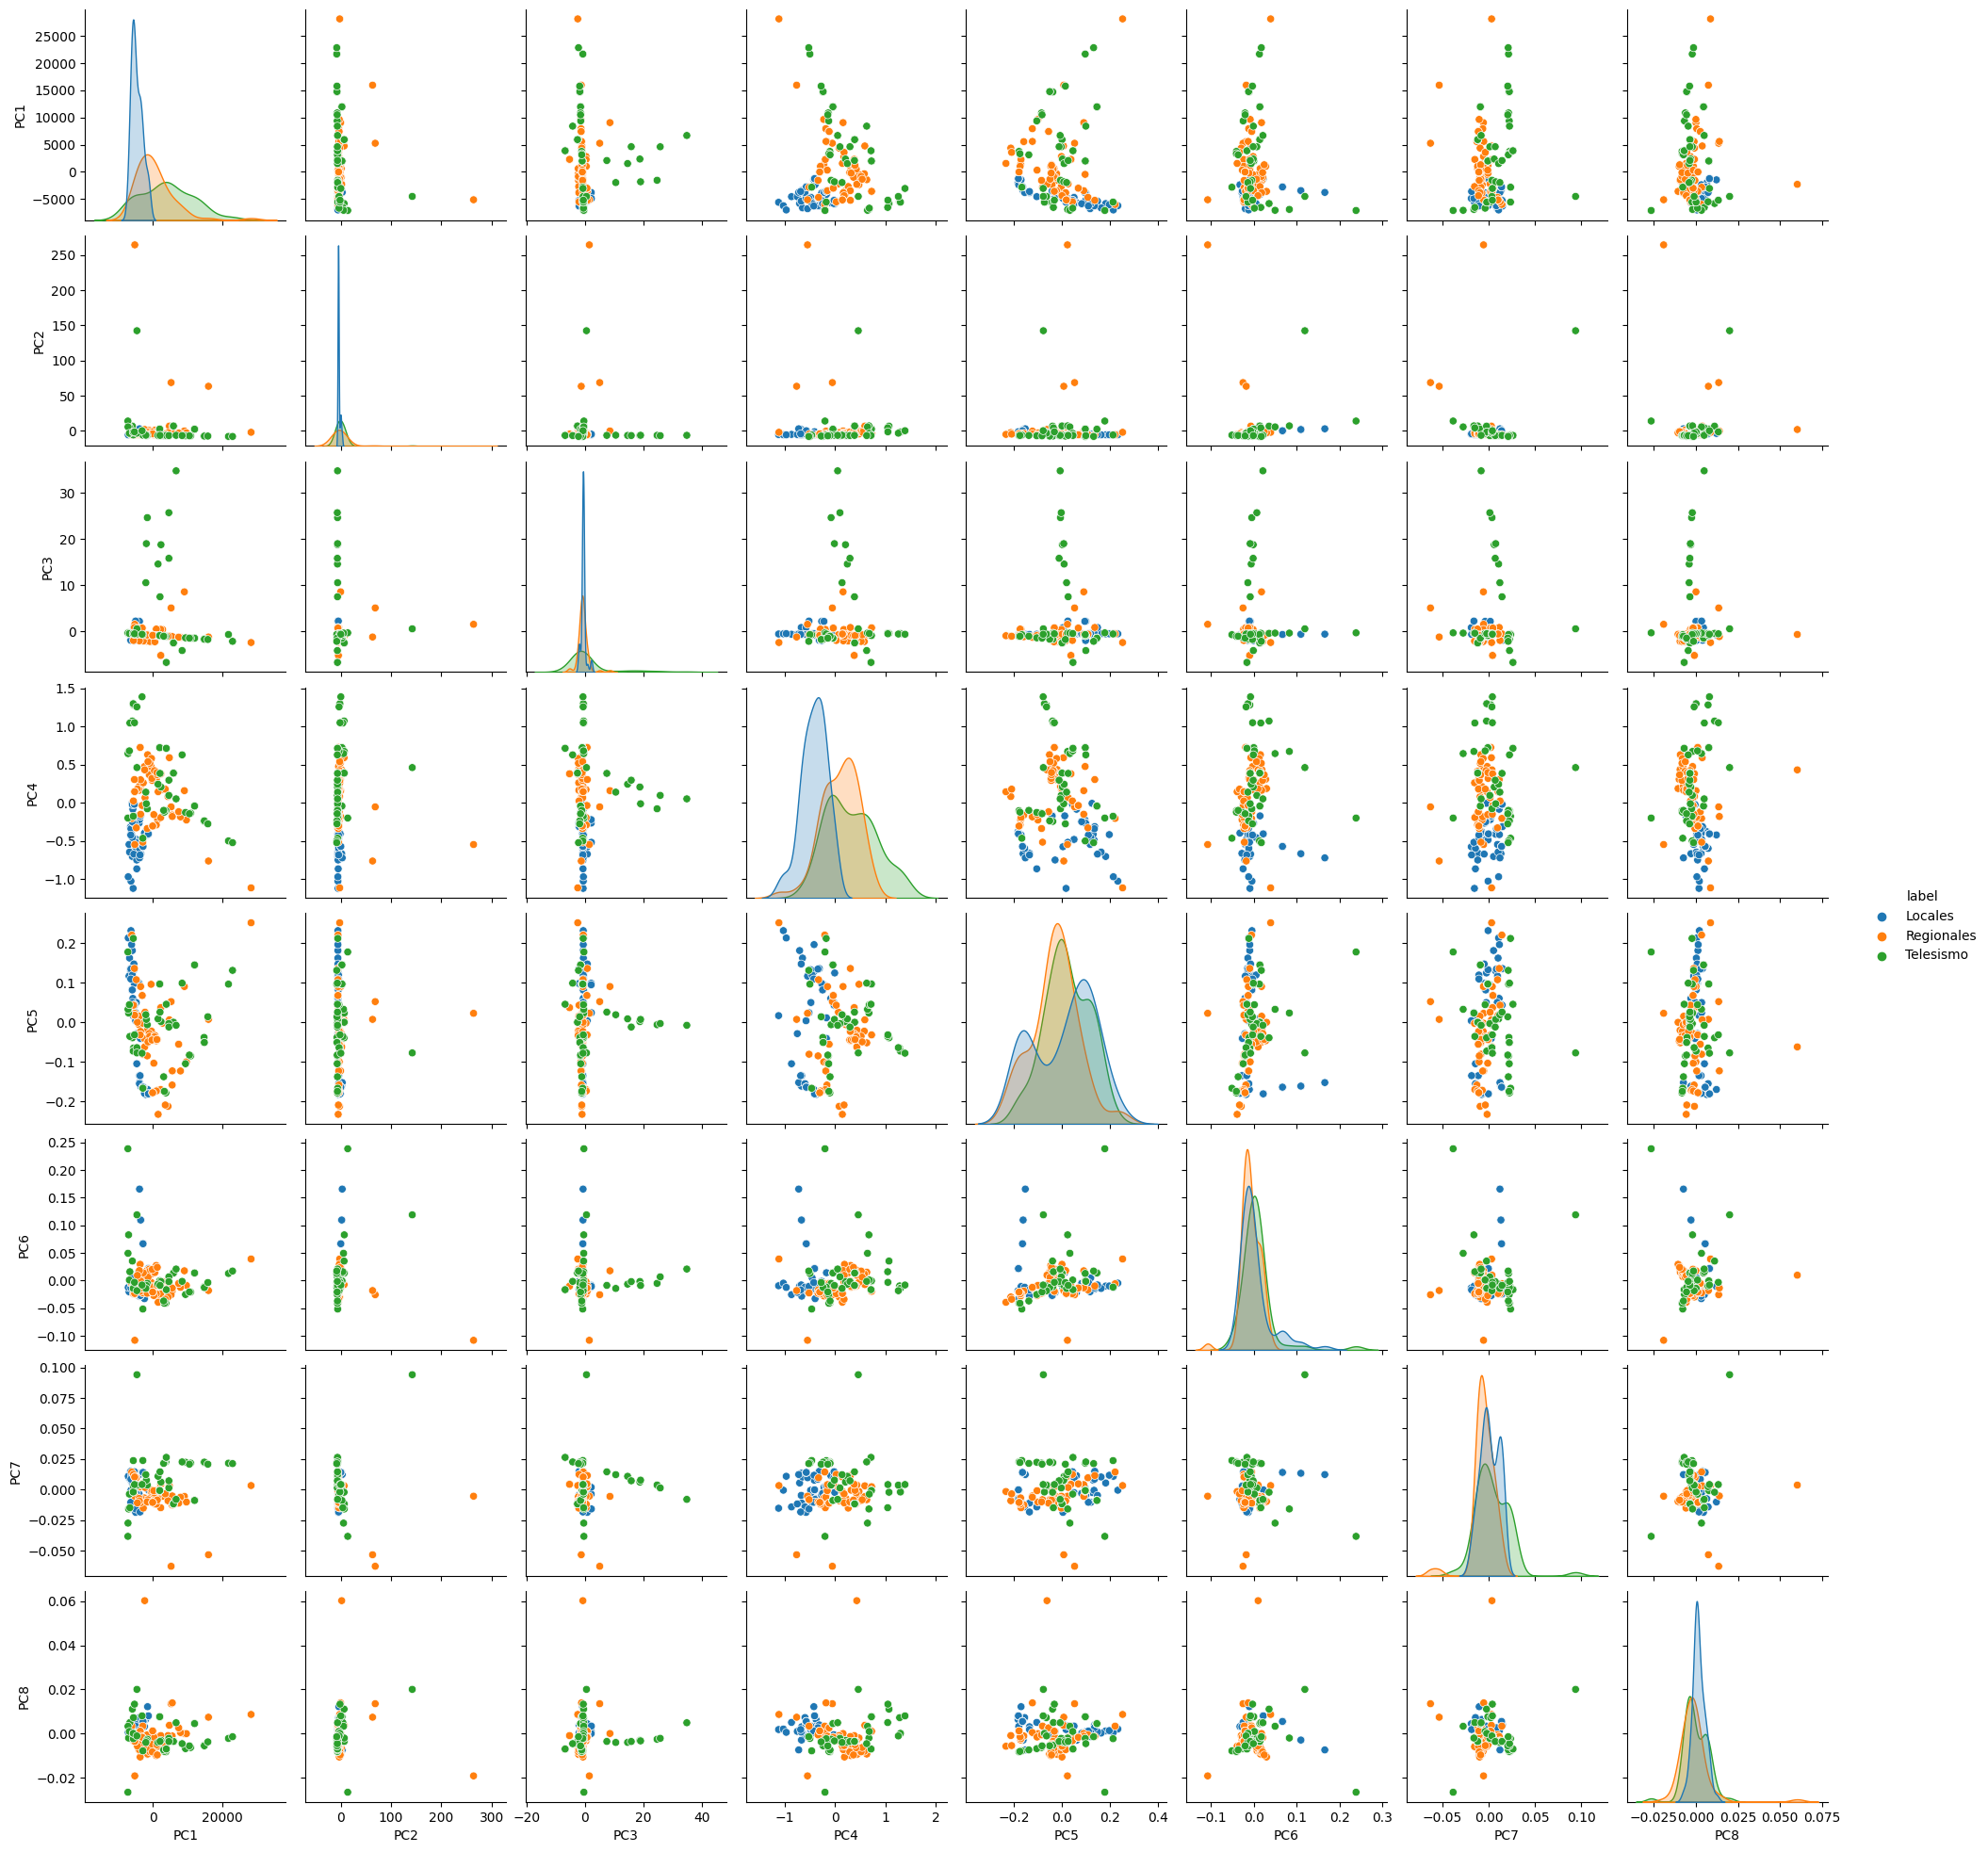

In [18]:
# def PCAplot(n):

pca = PCA(n_components=8)

Xpca=pca.fit_transform(X) # Entrenamos el modelo PCA (Calculamos los parámetros de proyección W, autovals, autovecs)

Xlatent=pca.transform(X)  #Transformamos los datos al espacio latente

column_names=['PC{}'.format(i+1) for i in range(8)]
column_names.append('label')

print(column_names)
df_latent=pd.DataFrame(np.column_stack((Xpca,data.Type)),columns=column_names)

df_latent['label']=data.Type
plt.clf()
sns.pairplot(df_latent,hue='label')


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Acc para el modelo Bayesiano:  0.7017543859649122
Acc para el modelo de Regresión Logística:  0.5789473684210527


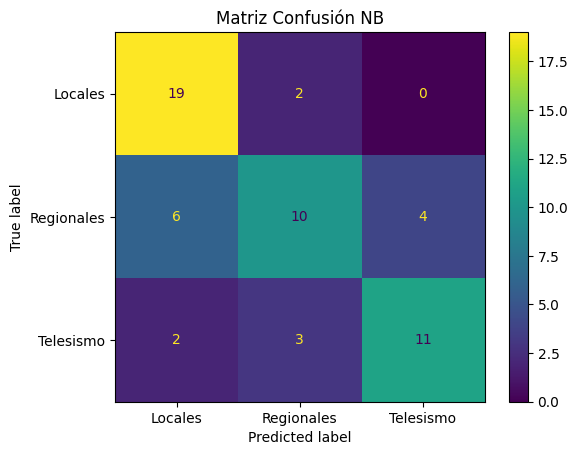

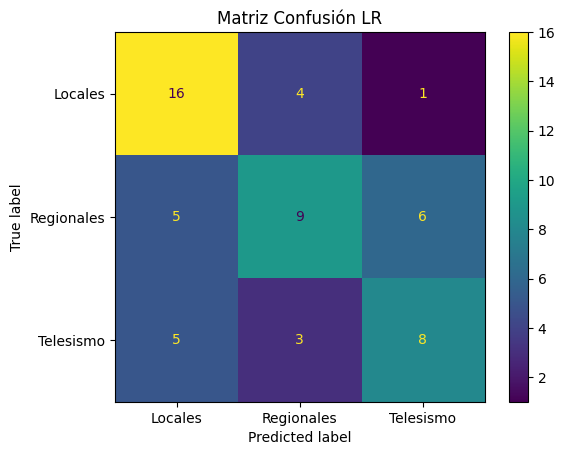

In [19]:

X_train, X_test, y_train, y_test = train_test_split(X[:,:18], y, test_size=0.3,random_state=42)

# Entrenar el clasificador Bayesiano
clfNB = GaussianNB()
clfNB.fit(X_train, y_train) # para entrenar enviamos el conjunto de Entrenamient

# Entrenar el clasificador de Regresión Logística
clfLR = LogisticRegression(random_state=0)
clfLR.fit(X_train, y_train) # para entrenar enviamos el conjunto de Entrenamient

# aux = X[0,:]
# aux2 = np.reshape(X[0,:],(1,19))

yPredTest_NB = clfNB.predict(X_test)
yPredTest_LR= clfLR.predict(X_test)

accTest_NB = accuracy_score(y_test,yPredTest_NB)
accTest_LR = accuracy_score(y_test,yPredTest_LR)

print('Acc para el modelo Bayesiano: ',accTest_NB)
print('Acc para el modelo de Regresión Logística: ',accTest_LR)


cmNB = confusion_matrix(y_test, yPredTest_NB)
disp = ConfusionMatrixDisplay(confusion_matrix=cmNB, display_labels=target_name)
disp.plot()
plt.title('Matriz Confusión NB')
plt.show()

cmLR = confusion_matrix(y_test, yPredTest_LR)
disp = ConfusionMatrixDisplay(confusion_matrix=cmLR, display_labels=target_name)
disp.plot()
plt.title('Matriz Confusión LR')
plt.show()

## Evaluacion del Desempeño

1. Accuracy score
2. Confussion Matrix

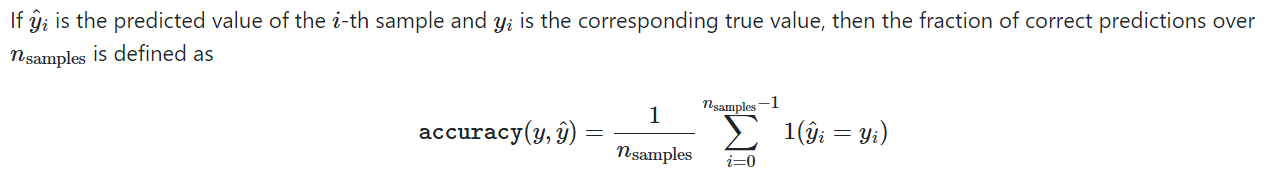

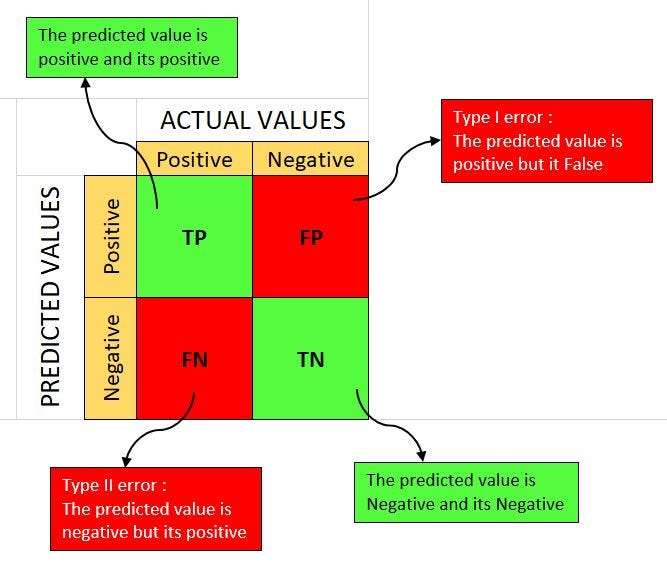

Acc para el modelo Bayesiano:  0.8070175438596491
Acc para el modelo de Regresión Logística:  0.8070175438596491


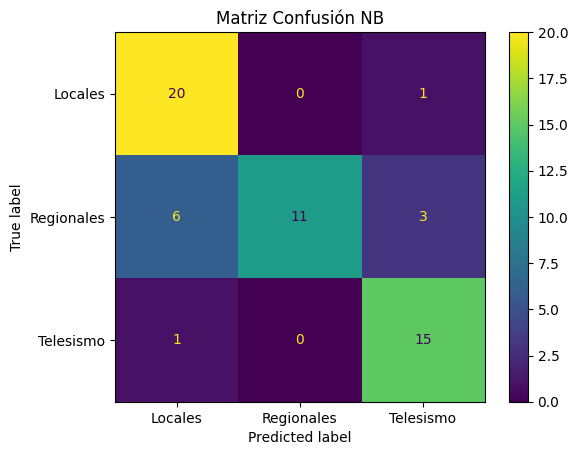

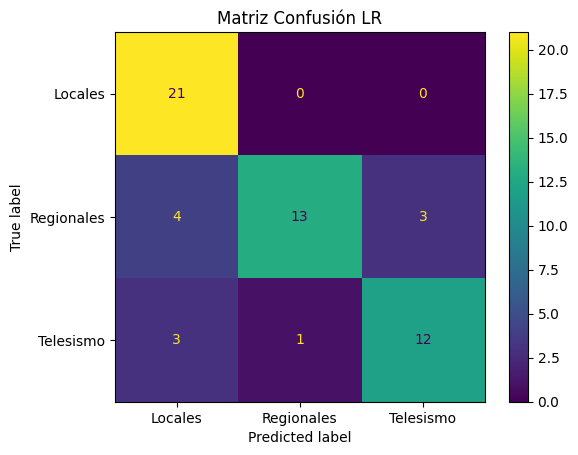

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

escala = StandardScaler()
X_train=escala.fit_transform(X_train)
X_test = escala.transform(X_test)

pca = PCA(n_components=8,svd_solver="randomized",whiten = True).fit(X_train)


X_trainlatente=pca.transform(X_train)  #Transformamos los datos al espacio latente
X_testlatente=pca.transform(X_test)
# Entrenar el clasificador Bayesiano

clfNB = GaussianNB()
clfNB.fit(X_trainlatente, y_train) # para entrenar enviamos el conjunto de Entrenamient

# Entrenar el clasificador de Regresión Logística
clfLR = LogisticRegression(random_state=0,max_iter=2000)
clfLR.fit(X_trainlatente, y_train) # para entrenar enviamos el conjunto de Entrenamient

# aux = X[0,:]
# aux2 = np.reshape(X[0,:],(1,19))

yPredTest_NB = clfNB.predict(X_testlatente)
yPredTest_LR= clfLR.predict(X_testlatente)

accTest_NB = accuracy_score(y_test,yPredTest_NB)
accTest_LR = accuracy_score(y_test,yPredTest_LR)

print('Acc para el modelo Bayesiano: ',accTest_NB)
print('Acc para el modelo de Regresión Logística: ',accTest_LR)


cmNB = confusion_matrix(y_test, yPredTest_NB)
disp = ConfusionMatrixDisplay(confusion_matrix=cmNB, display_labels=target_name)
disp.plot()
plt.title('Matriz Confusión NB')
plt.show()

cmLR = confusion_matrix(y_test, yPredTest_LR)
disp = ConfusionMatrixDisplay(confusion_matrix=cmLR, display_labels=target_name)
disp.plot()
plt.title('Matriz Confusión LR')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
